In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
#Define some parameters
img_size = 220
img_depth = 3
batch_size = 32

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 3.1MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-cp36-none-any.whl size=72859 sha256=a7e8574f322d22e378e9a07c2efc77a44bc98397fbe266431862f07010e6b4b0
  Stored in directory: /root/.cache/pip/wheels/57/4e/e8/bb28d035162fb8f17f8ca5d42c3230e284c6aa565b42b72674
Successfully built kaggle
  Found existing installation: kaggle 1.5.6
    Uninstalling kaggle-1.5.6:
      Successfully uninstalled kaggle-1.5.6


In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aakashyogi","key":"1f7780ba1889051a730dd728e530521e"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download -c 'plant-seedlings-classification'

 99% 1.67G/1.69G [00:24<00:00, 44.9MB/s]
100% 1.69G/1.69G [00:25<00:00, 72.4MB/s]


In [ ]:
!unzip plant-seedlings-classification.zip 

In [ ]:
ls  train

 Black-grass/        'Common wheat'/      'Scentless Mayweed'/
 Charlock/           'Fat Hen'/           'Shepherds Purse'/
 Cleavers/           'Loose Silky-bent'/  'Small-flowered Cranesbill'/
'Common Chickweed'/   Maize/              'Sugar beet'/


In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory('/content/train',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_size ,img_size ),
  batch_size=batch_size)

Found 4750 files belonging to 12 classes.
Using 3800 files for training.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']


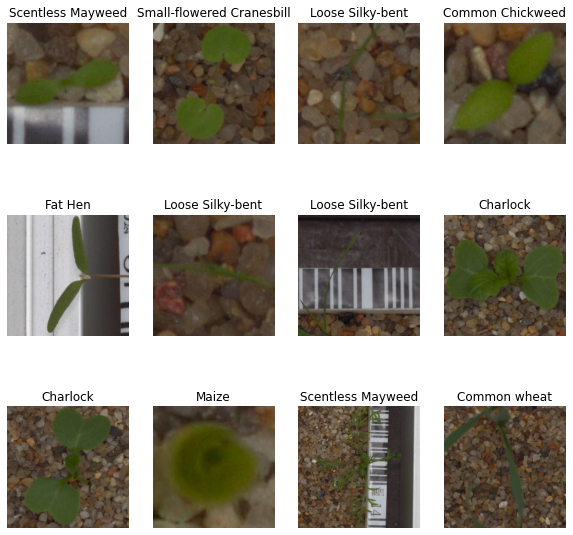

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
#ImageDataGenerator declaration with 20% data as test (80% for training)
img_generator= tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                               width_shift_range=0.2,
                                                               height_shift_range=0.2,
                                                               horizontal_flip=True,
                                                               validation_split=0.2)

In [ ]:
#Build training generator. 
train_generator = img_generator.flow_from_directory('/content/train',
                                                    target_size=(img_size, img_size),
                                                    subset='training',
                                                    batch_size=64)

#Build test generator
test_generator = img_generator.flow_from_directory('/content/train',
                                                   target_size=(img_size, img_size),                                                   
                                                   subset='validation',
                                                   batch_size=64)

Found 3803 images belonging to 12 classes.
Found 947 images belonging to 12 classes.


In [ ]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator()

In [ ]:
test_generator1 = test_datagen.flow_from_directory(
    directory="/content/test1",
    target_size=(img_size, img_size),
    color_mode="rgb",
    batch_size=64,
    class_mode=None,
    shuffle=False,
    seed=42
)

Found 794 images belonging to 1 classes.


In [ ]:
#Lets check the features (images) and Labels (flower class) returned by ImageDataGenerator
X, y = next(train_generator)

print('Input features shape', X.shape)
print('Actual labels shape', y.shape)

Input features shape (64, 220, 220, 3)
Actual labels shape (64, 12)


In [ ]:
#Clear any previous model from memory
tf.keras.backend.clear_session()

#Initialize model
model = tf.keras.models.Sequential()

#normalize data
model.add(tf.keras.layers.BatchNormalization(input_shape=(img_size,img_size,3,)))

#Add Conv Layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))

#Add Max Pool layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))


#normalize data
model.add(tf.keras.layers.BatchNormalization())

#Add Conv Layer
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))

#normalize data
model.add(tf.keras.layers.BatchNormalization())

#Add Max Pool layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))


#Add Conv Layer
model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))

#Add Max Pool layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))


#normalize data
model.add(tf.keras.layers.BatchNormalization())


#Add Conv Layer
model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), activation='relu', padding='same'))

#Add Max Pool layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(3,3) ,strides=2))

#Add Conv Layer
model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), activation='relu', padding='same'))

#Add Max Pool layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(3,3) ,strides=2))

#Add Dense Layers after flattening the data
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(4096, activation='relu'))

#Add Dropout
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Dense(4096, activation='relu'))

#Add Dropout
model.add(tf.keras.layers.Dropout(0.25))

#Add Output Layer
model.add(tf.keras.layers.Dense(12, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 220, 220, 3)       12        
_________________________________________________________________
conv2d (Conv2D)              (None, 220, 220, 64)      1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 220, 220, 64)      256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 110, 110, 64)      256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 110, 110, 128)     7

In [ ]:
#Specify Loass and Optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Saving the best model using model checkpoint callback
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('/content/seed_cnn.h5', 
                                                    save_best_only=True, 
                                                    monitor='val_accuracy', 
                                                    mode='max', 
                                                    verbose=1)

In [ ]:
history = model.fit_generator(train_generator,
                    epochs=100,
                    steps_per_epoch= 3803//64,  #Number of training images//batch_size
                    validation_data=test_generator,
                    validation_steps = 947//64, #Number of test images//batch_size
                    callbacks = [model_checkpoint])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
59/59 [==============================] - ETA: 0s - loss: 20.1762 - accuracy: 0.1236
Epoch 00001: val_accuracy improved from -inf to 0.11942, saving model to /content/seed_cnn.h5
59/59 [==============================] - 119s 2s/step - loss: 20.1762 - accuracy: 0.1236 - val_loss: 2.5698 - val_accuracy: 0.1194
Epoch 2/100
59/59 [==============================] - ETA: 0s - loss: 2.3502 - accuracy: 0.1583
Epoch 00002: val_accuracy improved from 0.11942 to 0.13951, saving model to /content/seed_cnn.h5
59/59 [==============================] - 114s 2s/step - loss: 2.3502 - accuracy: 0.1583 - val_loss: 3.8364 - val_accuracy: 0.1395
Epoch 3/100
59/59 [==============================] - ETA: 0s - loss: 2.1144 - accuracy: 0.2380
Epoch 00003: val_accuracy improved from 0.13951 to 0.19420, saving model to /content/seed_cnn.h5
59/59 [==============================] - 112s 2s/step - loss: 2.1144 - accuracy: 0.2380 -

Validation accuracy is 91%

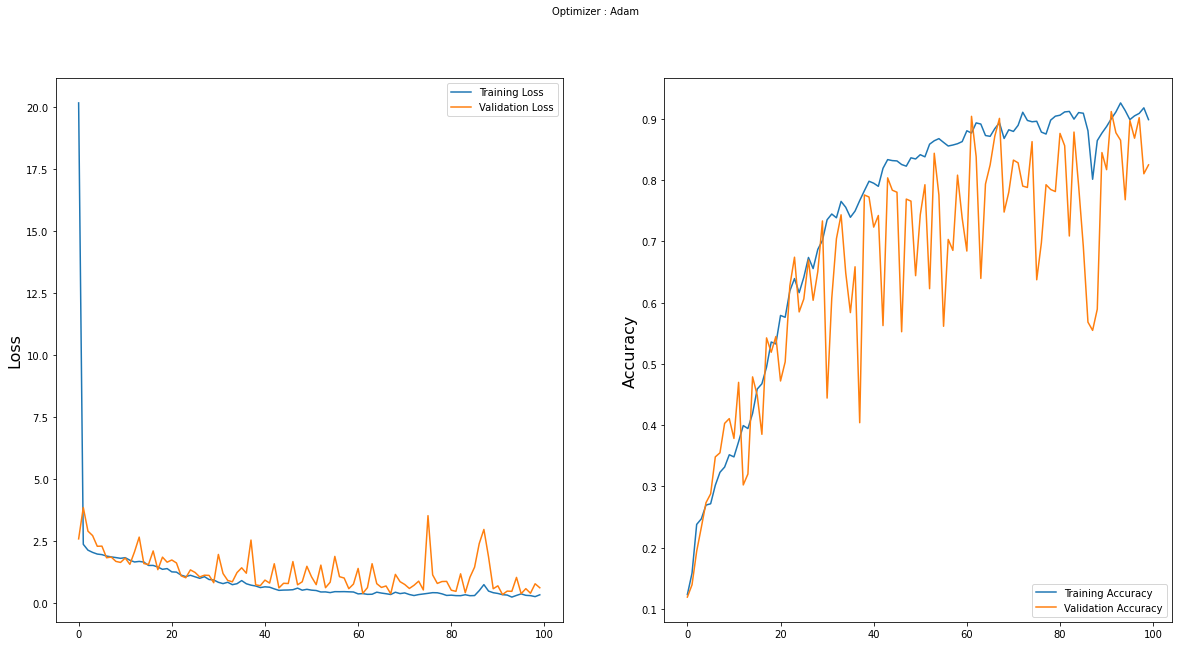

In [ ]:
# plot the evolution of Loss and Acuracy on the train and validation sets

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
model.save('/content/drive/My Drive/Plantseed.h5')

In [ ]:
#!ls

drive	     plant-seedlings-classification.zip  sample_submission.csv	train
kaggle.json  sample_data			 test


In [ ]:
#model = tf.keras.models.load_model('/content/drive/My Drive/Plantseed.h5')

In [ ]:

pred=model.predict_generator(test_generator1,
steps=STEP_SIZE_TEST,
verbose=1)

12/12 [==============================] - 4s 324ms/step


In [ ]:
predicted_class_indices=np.argmax(pred,axis=1)


In [ ]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [ ]:
print(predictions)

['Small-flowered Cranesbill', 'Fat Hen', 'Sugar beet', 'Common Chickweed', 'Sugar beet', 'Loose Silky-bent', 'Common Chickweed', 'Fat Hen', 'Loose Silky-bent', 'Loose Silky-bent', 'Fat Hen', 'Small-flowered Cranesbill', 'Sugar beet', 'Scentless Mayweed', 'Sugar beet', 'Fat Hen', 'Scentless Mayweed', 'Scentless Mayweed', 'Common Chickweed', 'Fat Hen', 'Common Chickweed', 'Small-flowered Cranesbill', 'Shepherds Purse', 'Sugar beet', 'Sugar beet', 'Maize', 'Scentless Mayweed', 'Scentless Mayweed', 'Common Chickweed', 'Sugar beet', 'Common Chickweed', 'Common Chickweed', 'Black-grass', 'Maize', 'Loose Silky-bent', 'Loose Silky-bent', 'Loose Silky-bent', 'Loose Silky-bent', 'Common Chickweed', 'Maize', 'Loose Silky-bent', 'Common wheat', 'Common Chickweed', 'Small-flowered Cranesbill', 'Sugar beet', 'Maize', 'Maize', 'Shepherds Purse', 'Maize', 'Small-flowered Cranesbill', 'Loose Silky-bent', 'Sugar beet', 'Cleavers', 'Loose Silky-bent', 'Maize', 'Fat Hen', 'Charlock', 'Small-flowered Crane

In [ ]:
from keras.preprocessing import image
import os
import numpy as np
# load all images into a list
folder_path = '/content/test1/test'
images = []
for img in os.listdir(folder_path):
    img = os.path.join(folder_path, img)
    img = image.load_img(img, target_size=(img_size,img_size))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    images.append(img)


In [ ]:
images = np.vstack(images)
classes = model.predict_classes(images, batch_size=10)
print(classes)

[ 4  3  9  2 10  6  6  3  8 11  0  3  3  6  1  5  0  8  3  2  5  3  4  8
  3  3 11 11  2 10  9  8  8  6  5 10  3  8  8 11  6 10  3  4  3  8  4  3
  8  2  5 10  1  3 11  1  6  7  5  3  6  8  9  8 10  7  9  5  3  1  7  7
  6  6  8  6  5  5  7  0 10  1  3  8  3  5  2  1  7 10 10  7 10  8  9 11
  6 11  5 10  9 10  8  3  3  3 11  6  3  6 11  8  0  7  5  9 11  5  8  8
  5  6  5  3 11 11  0  6  1  3  6 11  1 10  3  1  3  2  3  5  5  6  8  6
  5  2  1  3  8  2  4  2  4  6  0  1 10  8  5  8  6  9 11  6 11  4  6  1
 11 11  8  6  0  6  1  6  7  9  8 10 11  3  6  0  6 11  1  6  7  9  7 11
  6  1  3  8  8  3  3  7  4  8  6  0 10  5  2 11  3  6  6  7  1  4 10  3
 10 11  6  3  6  1  5  3  3  6  9  8  9 10  6  3  3 10 11  8  3  5  6  0
  1  6  2  6  9  6 11  1  5 11  3  0  5  7  9  5  8  3 10  8  1 11  6  1
  8  5  9  5 11  9 10  8  2  4  6  5  6  1  4  8  3 11  9  3 10  6  6 10
  8 11  1  5  3  2  6  3  3  6 10  2  3  3  6  6  8  7  8  3  6  6  4 11
  6 10  4  8 10  4  9  7 11  2  6  8  3  6  6  5  5

In [ ]:
import matplotlib.pyplot as plt
img = keras.preprocessing.image.load_img('/content/test1/test/026716f9b.png')
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis
predictions = model.predict(img_array)
score = predictions[0]
for i in range(0,11):
  b = predictions[0][i]
print(score)


[4.07e-01 7.71e-06 2.17e-04 2.64e-04 7.29e-03 1.83e-03 5.80e-01 2.06e-04
 2.18e-03 2.43e-05 5.53e-04 4.06e-04]


In [ ]:
for i in range(0,11):
  b = predictions[0][i]
  print("Probability Distribution for",i,b)

print("The Predicted Value is",np.argmax(predictions[0]))

Probability Distribution for 0 0.4071722
Probability Distribution for 1 7.713333e-06
Probability Distribution for 2 0.00021686872
Probability Distribution for 3 0.00026388603
Probability Distribution for 4 0.0072944327
Probability Distribution for 5 0.0018257684
Probability Distribution for 6 0.57985437
Probability Distribution for 7 0.0002057905
Probability Distribution for 8 0.00217607
Probability Distribution for 9 2.4271229e-05
Probability Distribution for 10 0.0005526975
The Predicted Value is 6


<Figure size 432x288 with 0 Axes>

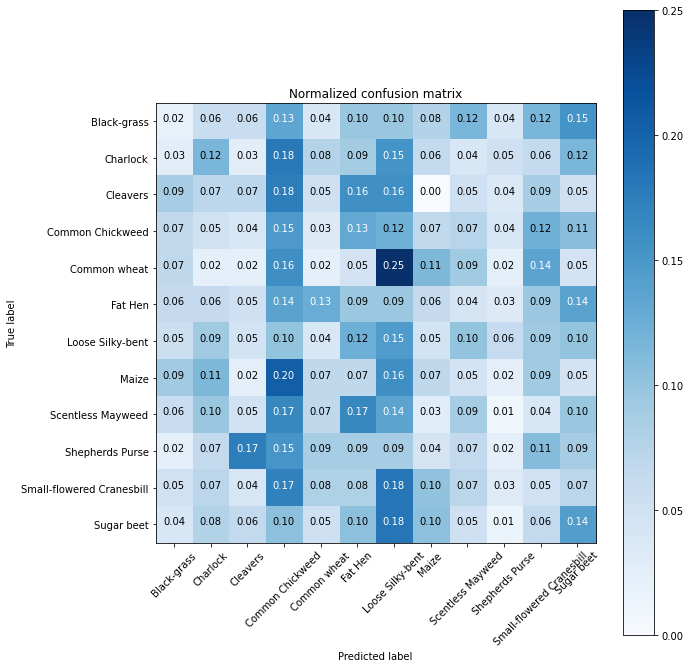

In [ ]:
# show the confusion matrix of our predictions

# compute predictions
predictions = model.predict_generator(generator=test_generator)
y_pred = [np.argmax(probas) for probas in predictions]
y = test_generator.classes
class_names = test_generator.class_indices.keys()

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()